In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# 准备数据集
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
# 定义仿LeNet模型
from keras import Model
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(
            filters=6,
            kernel_size=(5, 5),
            strides=1,
            activation='sigmoid',
            padding='valid',
        )
        self.p1 = MaxPool2D(
            pool_size=(2, 2),
            strides=2,
            padding='valid',
        )
        self.c2 = Conv2D(
            filters=16,
            kernel_size=(5, 5),
            strides=1,
            activation='sigmoid',
            padding='valid',
        )
        self.p2 = MaxPool2D(
            pool_size=(2, 2),
            strides=2,
            padding='valid',
        )
        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)
        x = self.c2(x)
        x = self.p2(x)
        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

In [13]:
from keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ModelCheckpoint
model = LeNet5()
model.compile(
    optimizer=Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, decay=0.03),
    loss = SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)
model_path = "./model/cifar10_LeNet"
cp_callback = ModelCheckpoint(
    filepath=model_path,
    save_weights_only=True,
    save_best_only=True,
)
# model.load_weights(model_path)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.15,
    validation_freq=20,
    callbacks=[cp_callback],
)

Epoch 1/100
665/665 [==============================] - 7s 11ms/step - loss: 2.3228 - sparse_categorical_accuracy: 0.0979
Epoch 2/100
665/665 [==============================] - 7s 11ms/step - loss: 2.3043 - sparse_categorical_accuracy: 0.1007
Epoch 3/100
363/665 [===============>..............] - ETA: 3s - loss: 2.3035 - sparse_categorical_accuracy: 0.1001

In [12]:
model.summary()

Model: "le_net5_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           multiple                  456       
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           multiple                  2416      
                                                                 
 max_pooling2d_7 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_9 (Dense)             multiple                  48

313/313 [==============================] - 1s 3ms/step - loss: 1.7768 - sparse_categorical_accuracy: 0.3461
test loss, test acc:  [1.7768033742904663, 0.34610000252723694]


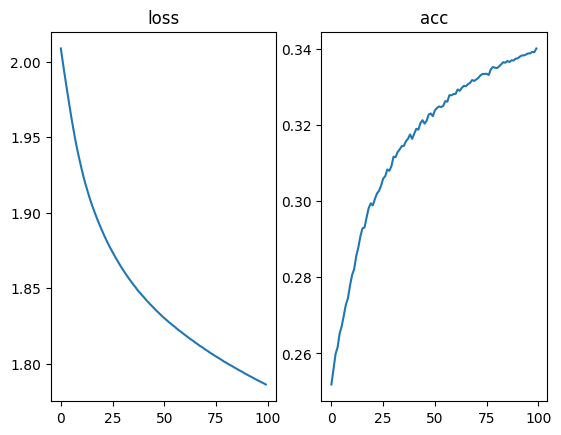

In [7]:
import matplotlib.pyplot as plt
import numpy as np
evaluate_result = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test acc: ", evaluate_result)

acc_history = history.history['sparse_categorical_accuracy']
loss_history = history.history['loss']

plt.subplot(1, 2, 1)
plt.title('loss')
plt.plot(np.arange(len(loss_history)), loss_history)

plt.subplot(1, 2, 2)
plt.title('acc')
plt.plot(np.arange(len(acc_history)), acc_history)